# Chapter 6: Perceptron and Neuronal Networks

## 6.1 Introduction

**perceptron**: artificial neuron


### 6.1.1 Biological Neuron

![title](Images/BiologicalNeuron.png)


## 6.2 Perceptron

Perceptron was introduced by Rosenblatt in 1957.
Multiple layers in the architecture of the perceptron -> artificial neuronal networks

Geometrically a single-layer perceptron with linear mapping represents a linear plane in n-dimensions.

- input vector: ($x_1$, $x_2$, ..., $x_n$) or **x**
- coefficients/weights: ($w_1$, $w_2$, ..., $w_n$) or **w**

Equation of perceptron in n-dimensions: 

\begin{equation}
\textbf{x.w} = y
\end{equation}

The differences to linear regression lie in the way the weights are computed or learned.


### 6.2.1 Implementing perceptron


Perceptron architecture is primarly used for classification.

**Example:**

Iris data set: 150 samples, 50 per type, 4 features -> 4 dimensions
The original data is not linearly separable -> low accuracy

In [4]:
from sklearn import datasets
from sklearn.linear_model import Perceptron

iris = datasets.load_iris()
x = iris.data
y = iris.target

iris.feature_names, iris.target_names

clf = Perceptron(random_state=0)
clf.fit(x, y)
clf.score(x, y)
y_pred = clf.predict(x)

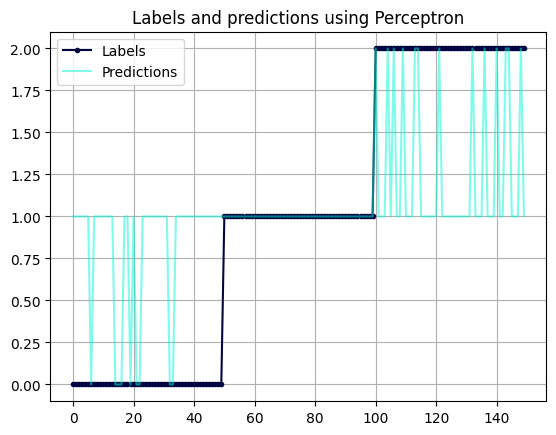

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.title("Labels and predictions using Perceptron")
plt.legend(loc = "upper left")
plt.grid(True) 
plt.show()

If there are multiple variables to be predicted using the same set of inputs, one can have a series of perceptrons in parallel to generate those outputs. This architecture is called as single-layer perceptron.

## 6.3 Multilayered Perceptron or Artificial Neuronal Network

Multilayered Percetron (MLP) is a logical extension of the single-layer architecture.
Each layer can contain an arbitrary number of nodes or perceptrons.

The layers of nodes between input and output layers are called hidden layers, as their size is independent and they are not directly visible.

Typically the more complex the relation between inout and output, the more and bigger hidden layers are used.
The consecutive layers in MLP are fully connected.
Using linear mapping there is mathematically no difference between single and multilayered perceptrons.
$\newline\Rightarrow$ The real benefits surface with use of nonlinear activation functions


### 6.3.1 Feedforward Operation

There is no feedback of information from any layer backwards (similar to human brain).


### 6.3.2 Nonlinear MLP or Nonlinear ANN

#### 6.3.2.1 Activation Functions

Most simple function: step function (also called sign function)
-> suited for applications like binary classification

Continuous version of step function: hyperbolic tan or *tanh* function

Sigmoid function: Same as *tanh*, but range [0, 1] instead of [-1, 1]


### 6.3.3 Training MLP

During the training process the weights of the network are learned from the labelled training data using the process of backpropagation.

Backpropagation-based training can be done in two different methods

1. Online or stochastic method
2. Batch method

#### 6.3.3.1 Online or stochastic learning

In this method a single sample or a small subset of an entire training set (drawn randomly) is sent as input to the network, and based on the output error, the weights are updated. The optimization method most commonly used to update the weights in this setup is called stochastic gradient descent method (SGD).

#### 6.3.3.2 Batch Learning

In batch method the entire training dataset is used and divided into small and deterministic set of batches. The entire batch of samples is sent to the network before computing the error and updating the weights. After an entire batch is processed, the weights are updated. The training process using each batch is called as one iteration. When all the samples are used once, it is considered as one epoch in the training process.
$\newline\Rightarrow$ cleaner learning path, more computation heavy, more memory necessary


### 6.3.4 Hidden Layers

Number of hidden layers and dimension of hidden layer -> hyperparameter

-> open-ended exploration is necessary, combination of best results


### 6.3.5 Implementing MLP

locistic activation function, single hidden layer with 50 nodes

In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(50,))
mlp.fit(x, y)

y_pred_mlp = mlp.predict(x)
mlp.score(x, y)


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9733333333333334

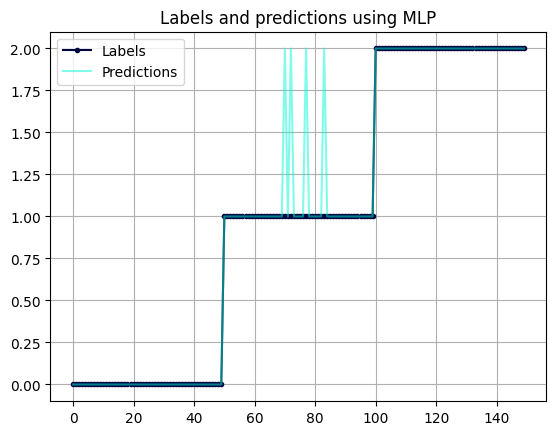

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred_mlp, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.title("Labels and predictions using MLP")
plt.legend(loc = "upper left")
plt.grid(True) 
plt.show()

## 6.4 Radial Basis Function Networks

Radial Basis Function Networks *RBFN* or radial basis function neuronal networks *RBFNN* are a variation of the feedforward neuronal networks.
Functionally they are more close to SVMs.

They are characterized by three layers:
- input layer
- single hidden layer
- output layer

The input and output layers are linear weighing functions and the hidden layer has a radial basic activation function.
The basic function is defined as: 

\begin{equation}
\mathnormal{f}_{RBF} (x) = e^{-\beta {||x - \mu ||}^2}
\end{equation}

- $\mu$ is called as center
- $\beta$ represents the spread or variance of the radial base function


### 6.4.1 Interpretation of RBF Networks

RBF network as a whole maps the input space to the output space by linear combination of outputs generated by each hidden RBF node. It is important to choose these cluster centers carefully to make sure the input space is mapped uniformly and there are no gaps. The training algorithm is capable of finding the optimal centers, but the number of clusters to use is a hyperparameter.


### 6.4.2 Implementing RBF Networks

In [15]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

rbfn = GaussianProcessClassifier(kernel=kernel, random_state=0)
rbfn.fit(x, y)

y_pred_rbfn = rbfn.predict(x)
rbfn.score(x, y)

0.9866666666666667

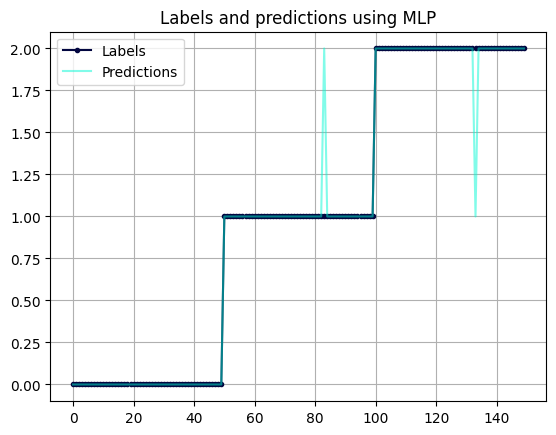

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred_rbfn, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.title("Labels and predictions using MLP")
plt.legend(loc = "upper left")
plt.grid(True) 
plt.show()

## 6.5 Overfitting

Complexity of a network can be increased by manipulating various factors as follows:

- Increasing the number of hidden layers
- Increasing the nodes in hidden layers
- Using complex activation functions
- Increasing the training epochs

### 6.5.1 Concept on Regularization

By altering the optimization functional with some added terms, the range of values that the parameters of the algorithm can take is limited.
-> Memorization is avoided


# 6.5.2 L1 and L2 Regularization

**L1** regularization: 
- tries to minimize sum of absolute values in the weights
- less sensitive to strong outliers
- less computation
- tends to reduce overall dimensionality by dropping weights


\begin{equation}
C(x) = L(x) + \lambda \sum ||W||
\end{equation}

- $L(x)$: Loss function
- $W$: vector of weights

**L2** regularization:

- tries to minimize sum of squared values of the weights
- overall better metric
- more computation

\begin{equation}
C(x) = L(x) + \lambda \sum {||W||}^2
\end{equation}


### 6.5.3 Dropout Regularization

In dropout regularization, the neural network is considered as an ensemble of neurons in sequence, and instead of using a fully populated neural network, some neurons are randomly dropped from the path. The effect of each dropout on overall accuracy is considered, and after some iterations, an optimal set of neurons is selected in the final models.

## 6.7 Exercises

In [33]:
from sklearn.metrics import accuracy_score, precision_score

hidden_layer_list = [(50, 50, 50,), (50,), (50, 50,), (10, 10, 10,), (50, 50, 10,), (25, 25, 25), (100, ), (100, 50,)]
mlp_scores = []
mlp_accuracy = []

for hid_lay in hidden_layer_list:
    mlp_tester = MLPClassifier(activation="logistic", hidden_layer_sizes=hid_lay)
    mlp_tester.fit(x, y)
    y_pred_mlp_tester = mlp_tester.predict(x)
    mlp_scores.append(mlp_tester.score(x, y))
    mlp_accuracy.append(accuracy_score(y, y_pred_mlp_tester))

# mlp_scores
mlp_accuracy 

c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_netw

[0.9866666666666667,
 0.9466666666666667,
 0.9866666666666667,
 0.68,
 0.9666666666666667,
 0.3333333333333333,
 0.9733333333333334,
 0.98]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mlp_accuracy_train = []

for hid_lay in hidden_layer_list:
    mlp_tester = MLPClassifier(activation="logistic", hidden_layer_sizes=hid_lay)
    mlp_tester.fit(X_train, y_train)
    y_pred_mlp_tester = mlp_tester.predict(X_test)
    mlp_accuracy_train.append(accuracy_score(y_test, y_pred_mlp_tester))

mlp_accuracy_train

c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\neural_netw

[1.0,
 0.9777777777777777,
 0.9555555555555556,
 0.28888888888888886,
 0.9777777777777777,
 0.28888888888888886,
 0.9555555555555556,
 0.9777777777777777]

In [37]:
rbfn_test = GaussianProcessClassifier(kernel=kernel, random_state=2, max_iter_predict=10)
rbfn_test.fit(x, y)

y_pred_rbfn_test = rbfn.predict(x)
rbfn_test.score(x, y)
accuracy_score(y, y_pred_rbfn_test)

0.9866666666666667

In [41]:
from sklearn.linear_model import Ridge

reg = Ridge(random_state=0)
reg.fit(x, y)
reg.score(x, y)
y_pred_reg = reg.predict(x)
